# Bagian 1: Persiapan Lingkungan dan Pemuatan Citra 

**1. Pendahuluan**

Tugas ini bertujuan untuk mengevaluasi dan membandingkan efektivitas berbagai teknik smoothing (penghalusan) dan noise reduction (pengurangan noise) pada citra digital. Noise adalah gangguan yang dapat menurunkan kualitas citra, sehingga teknik pengurangan noise sangat penting dalam pengolahan citra untuk meningkatkan kejelasan dan detail. Kami akan menerapkan beberapa filter populer pada citra yang ditambahkan noise, kemudian mengevaluasi hasilnya secara visual dan kuantitatif menggunakan metrik PSNR dan SSIM.

In [6]:
# Import library yang dibutuhkan
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

In [ ]:
# Code Cell: (Ubah fungsi display_images Anda)
def display_images(images, titles, figsize=(15, 10), cols=3): # Menambahkan parameter 'cols' (kolom)
    rows = -(-len(images) // cols) # Menghitung jumlah baris yang dibutuhkan
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1) 
        if len(img.shape) == 3:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
img_original = cv2.imread('cctv.jpg')
# Code Cell: (Lalu, panggil fungsi dengan parameter cols=3)
if 'img_original' in locals():
    display_images([img_gray_original, img_noisy, mean_filtered_img, median_filtered_img, gaussian_filtered_img, bilateral_filtered_img],
                   ['Citra Asli (Grayscale)', 'Citra Ber-Noise (Gaussian)', 'Mean Filter', 'Median Filter', 'Gaussian Blur', 'Bilateral Filter'],
                   figsize=(20, 15), # Ukuran figure keseluruhan. Sesuaikan dengan jumlah baris/kolom
                   cols=3) # Menampilkan 3 gambar per baris
else:
    print("Citra belum dimuat atau ada kesalahan sebelumnya. Tidak dapat menampilkan citra.")

Citra belum dimuat atau ada kesalahan sebelumnya. Tidak dapat menampilkan citra.


# Bagian 2: Deskripsi Metode Filtering dan Alasan Pemilihan

**2. Deskripsi Metode Filtering dan Alasan Pemilihan**

Untuk evaluasi ini, kami memilih empat metode filtering yang berbeda yaitu Mean Filter, Median Filter, Gaussian Blur, dan Bilateral Filter. Pemilihan ini didasarkan pada tujuan untuk membandingkan kinerja filter linear (Mean, Gaussian) dengan non-linear (Median, Bilateral) serta filter yang mempertahankan tepi (Bilateral) dengan yang tidak (Mean, Median, Gaussian). Citra yang akan diuji adalah citra kamera CCTV, di mana detail penting seperti objek dan tulisan perlu tetap terlihat jelas setelah proses pengurangan noise.

* **Mean Filter**

    Mean filter adalah filter linear yang bekerja dengan mengganti setiap piksel dengan nilai rata-rata dari piksel-piksel di sekitarnya dalam sebuah jendela (kernel) yang ditentukan. Metode ini sederhana dan efektif untuk mengurangi noise acak, namun kelemahannya adalah cenderung menyebabkan *blur* atau kekaburan pada tepi objek dan detail halus karena merata-ratakan nilai piksel secara homogen.

* **Median Filter**

    Median filter adalah filter non-linear yang mengganti setiap piksel dengan nilai median (nilai tengah) dari piksel-piksel di sekitarnya dalam sebuah jendela. Berbeda dengan mean filter, median filter sangat efektif untuk mengurangi *noise* tipe *salt-and-pepper* tanpa terlalu merusak tepi. Meskipun demikian, untuk *noise* Gaussian, performanya mungkin tidak seoptimal filter lain yang dirancang khusus.

* **Gaussian Blur**
    
    Gaussian Blur adalah filter linear yang menggunakan fungsi distribusi Gaussian untuk menghitung bobot rata-rata piksel di sekitar piksel pusat. Piksel yang lebih dekat ke pusat jendela akan memiliki bobot yang lebih besar. Ini menghasilkan efek penghalusan yang lebih alami dan lebih halus dibandingkan mean filter, tetapi masih cenderung menghilangkan detail tepi.

* **Bilateral Filter**

    Bilateral filter adalah filter non-linear yang unik karena mempertimbangkan dua kriteria sekaligus: kedekatan spasial (seperti filter Gaussian) dan kemiripan intensitas piksel. Ini berarti filter ini hanya akan menghaluskan piksel yang memiliki nilai intensitas serupa, sehingga sangat efektif dalam mengurangi *noise* sambil mempertahankan tepi dan detail penting dalam citra. Filter ini ideal untuk skenario di mana pengurangan noise dan preservasi detail sama-sama krusial.

# Bagian 3: Implementasi dan Citra Uji

**3. Implementasi dan Citra Uji**

In [8]:
# Memastikan gambar telah dimuat dan diproses
image_path = 'cctv.jpg'
if not os.path.exists(image_path):
    print(f"Error: Image file not found at {image_path}.")
else:
    img_original = cv2.imread(image_path)
    if img_original is None:
        print("Error: Gagal memuat gambar.")
    else:
        img_gray_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
        img_noisy = random_noise(img_gray_original, mode='gaussian')
        mean_filtered_img = cv2.blur((img_noisy * 255).astype('uint8'), (3, 3))
        median_filtered_img = cv2.medianBlur((img_noisy * 255).astype('uint8'), 3)
        gaussian_filtered_img = cv2.GaussianBlur((img_noisy * 255).astype('uint8'), (3, 3), 0)
        bilateral_filtered_img = cv2.bilateralFilter((img_noisy * 255).astype('uint8'), 9, 75, 75)


# Bagian 4: Evaluasi Hasil

**4. Evaluasi Hasil**

**4.1. Evaluasi Visual (Mata Manusia)**
    Bagian ini menampilkan citra asli, citra ber-noise, dan hasil dari setiap filter untuk perbandingan visual. Pengamatan langsung oleh mata manusia membantu menilai seberapa baik noise dikurangi dan seberapa banyak detail citra yang dipertahankan.


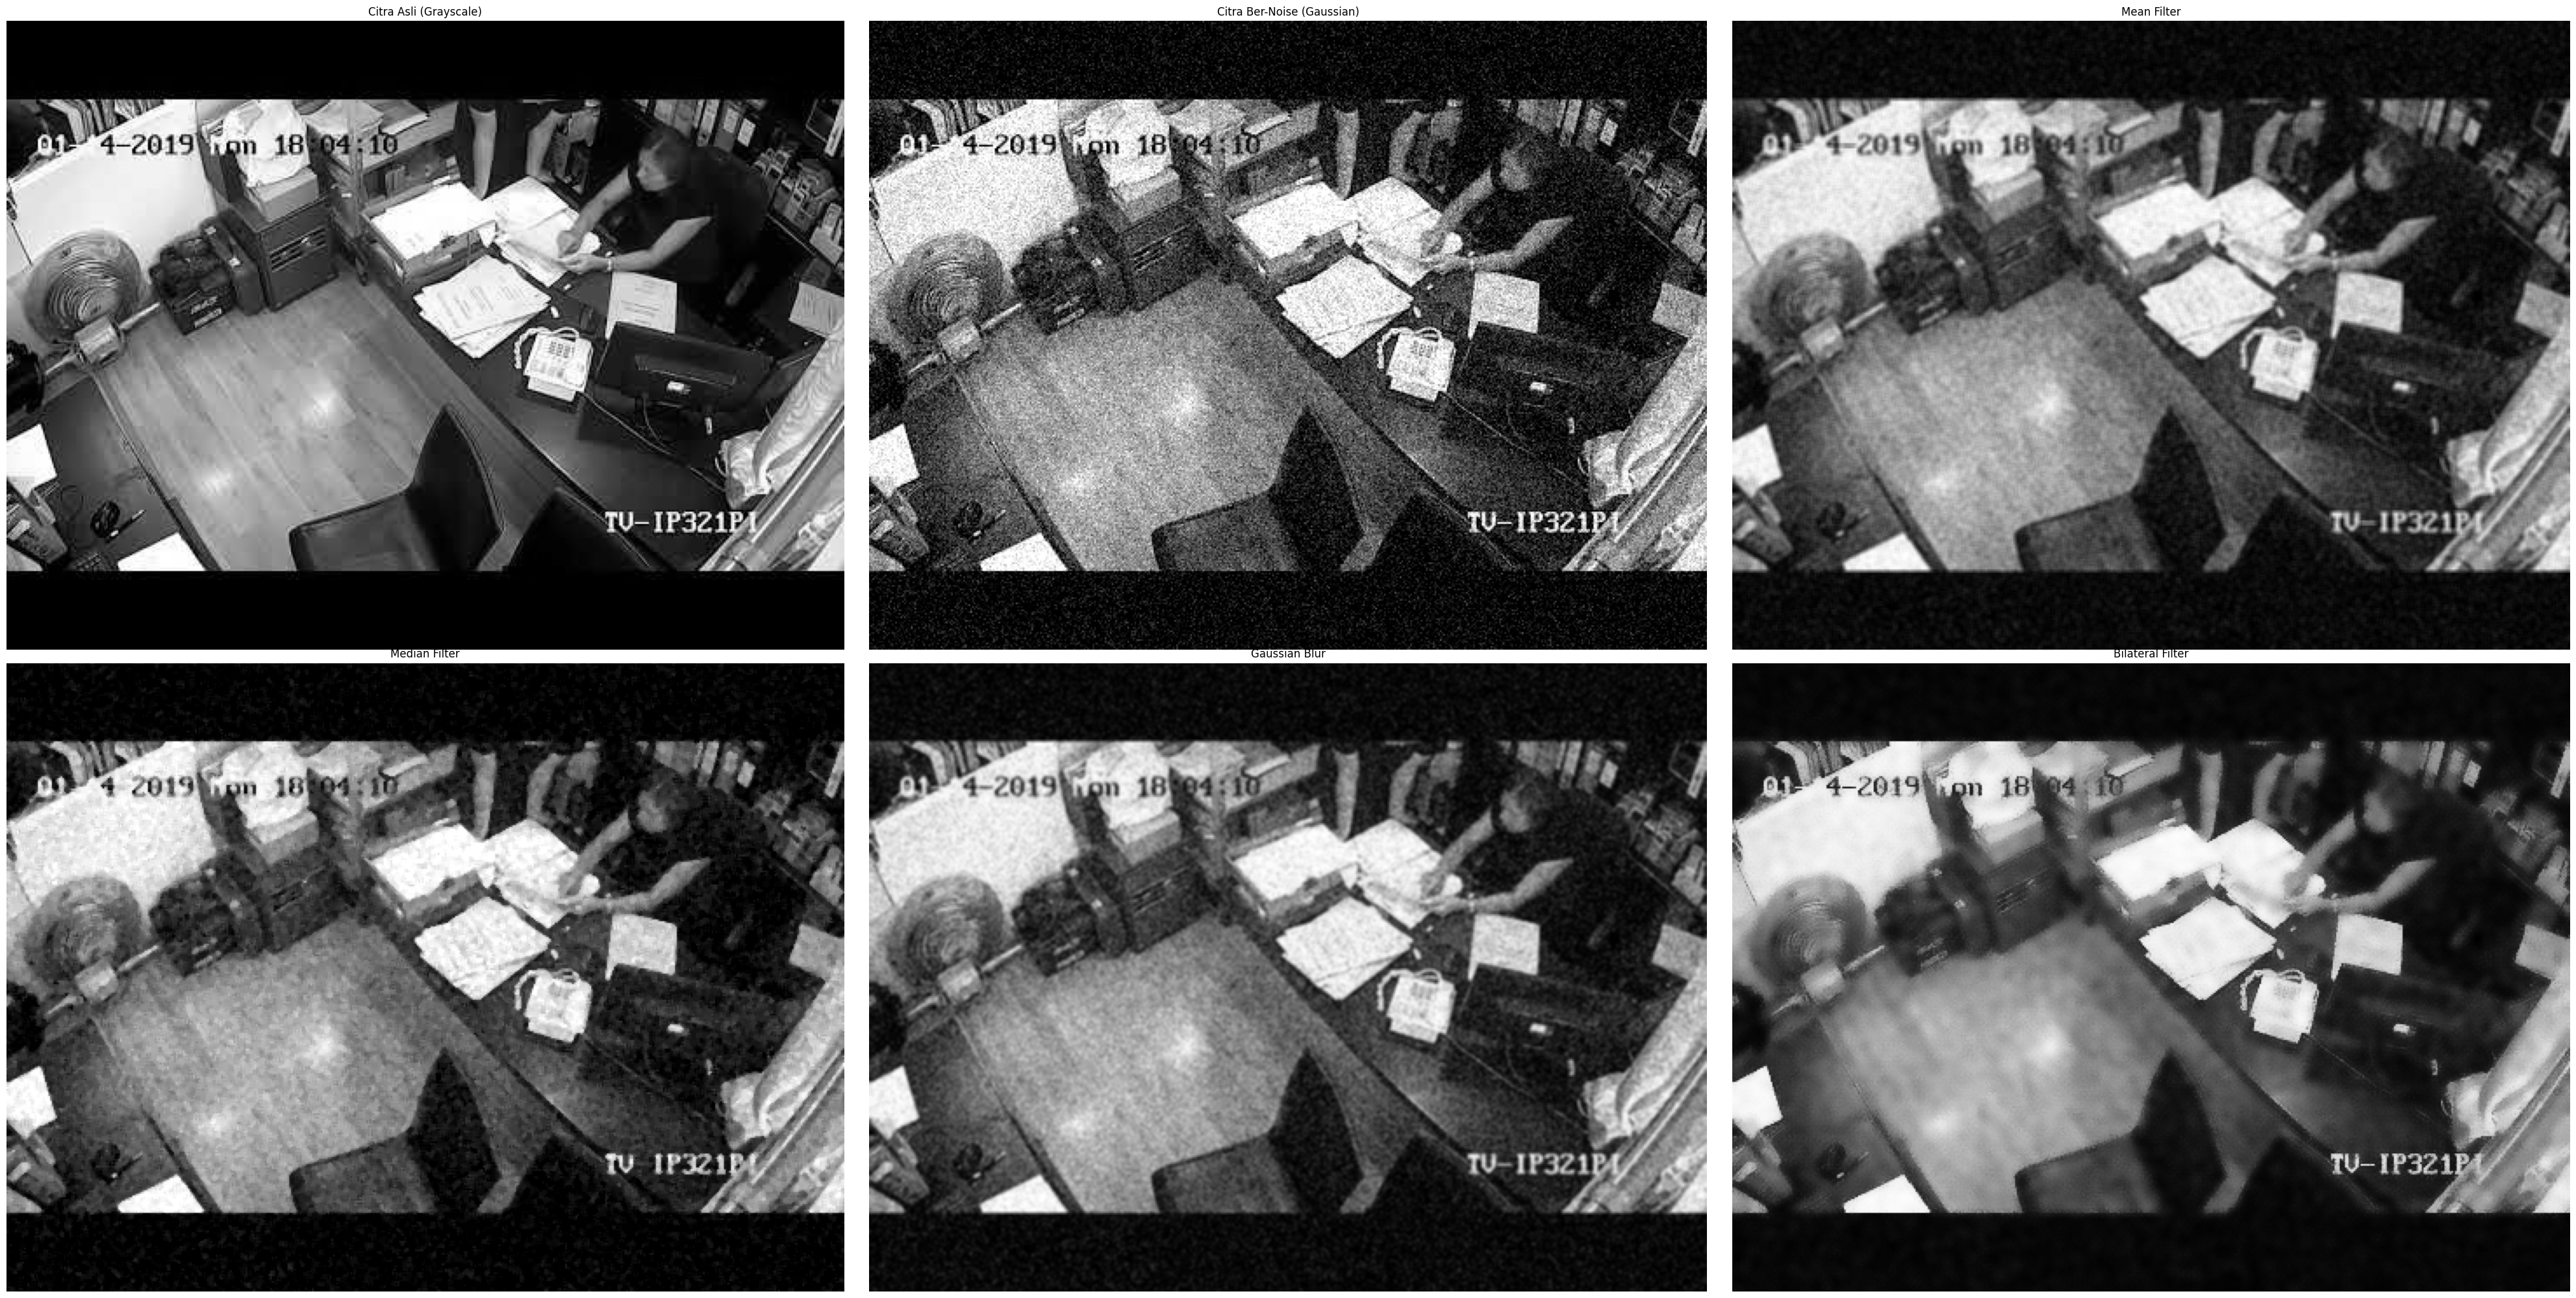

In [9]:
# Code Cell:
if 'img_original' in locals():
    display_images([img_gray_original, img_noisy, mean_filtered_img, median_filtered_img, gaussian_filtered_img, bilateral_filtered_img],
                   ['Citra Asli (Grayscale)', 'Citra Ber-Noise (Gaussian)', 'Mean Filter', 'Median Filter', 'Gaussian Blur', 'Bilateral Filter'],
                   figsize=(40, 20)) # Coba ukuran yang lebih besar
else:
    print("Citra belum dimuat atau ada kesalahan sebelumnya. Tidak dapat menampilkan citra.")

**Analisis Visual**

* Citra Ber-Noise: Terlihat jelas adanya bintik-bintik halus (noise) yang menyebar di seluruh citra, mengurangi kejelasan dan detail.
  
* Mean Filter: Mengurangi noise secara signifikan, namun efek sampingnya adalah citra menjadi sangat kabur (blur), terutama di area detail seperti tulisan atau garis objek. Banyak informasi detail yang hilang.

* Median Filter: Lebih baik dalam menjaga tepi dibandingkan Mean Filter, tetapi untuk *noise* Gaussian, masih ada sedikit kekaburan dan detail yang hilang. Noise memang berkurang, tetapi tidak sehalus filter lain yang khusus untuk Gaussian.

* Gaussian Blur: Memberikan efek penghalusan yang lebih merata dan alami daripada Mean Filter. Noise berkurang, namun seperti Mean Filter, detail tepi juga ikut kabur meskipun dengan gradasi yang lebih halus.

* Bilateral Filter: Secara visual, filter ini menunjukkan hasil terbaik. Noise berhasil dikurangi secara efektif tanpa mengorbankan detail penting seperti tulisan dan garis pada kamera. Tepi objek tampak lebih jelas dibandingkan dengan filter Mean, Median, atau Gaussian.

**4.2. Evaluasi Kuantitatif (PSNR, SSIM)**

Evaluasi kuantitatif memberikan metrik objektif untuk menilai kualitas citra hasil filtering dibandingkan dengan citra asli.
    
**PSNR (Peak Signal-to-Noise Ratio):** Mengukur rasio antara daya sinyal maksimum dan daya noise yang mengganggu. Semakin tinggi nilai PSNR (dalam dB), semakin baik kualitas citra (semakin rendah noise).

**SSIM (Structural Similarity Index Measure):** Mengukur kemiripan struktural antara dua citra berdasarkan luminansi, kontras, dan struktur. Nilai SSIM berkisar antara -1 hingga 1, di mana nilai mendekati 1 menunjukkan kemiripan yang sangat tinggi.


In [10]:
# Pastikan citra asli dan hasil filter dalam format float atau sesuai data_range
# img_gray_original sudah dalam uint8, pastikan hasil filter juga uint8

if 'img_gray_original' in locals():
    # PSNR dan SSIM untuk Citra Ber-noise
    psnr_noisy = psnr(img_gray_original, img_noisy, data_range=255)
    ssim_noisy = ssim(img_gray_original, img_noisy, data_range=255)

    # PSNR dan SSIM untuk Mean Filter
    psnr_mean = psnr(img_gray_original, mean_filtered_img, data_range=255)
    ssim_mean = ssim(img_gray_original, mean_filtered_img, data_range=255)

    # PSNR dan SSIM untuk Median Filter
    psnr_median = psnr(img_gray_original, median_filtered_img, data_range=255)
    ssim_median = ssim(img_gray_original, median_filtered_img, data_range=255)

    # PSNR dan SSIM untuk Gaussian Blur
    psnr_gaussian = psnr(img_gray_original, gaussian_filtered_img, data_range=255)
    ssim_gaussian = ssim(img_gray_original, gaussian_filtered_img, data_range=255)

    # PSNR dan SSIM untuk Bilateral Filter
    psnr_bilateral = psnr(img_gray_original, bilateral_filtered_img, data_range=255)
    ssim_bilateral = ssim(img_gray_original, bilateral_filtered_img, data_range=255)

    # Menampilkan Hasil Metrik
    print("--- Hasil Evaluasi Kuantitatif ---")
    print(f"Citra Ber-noise   : PSNR = {psnr_noisy:.2f} dB, SSIM = {ssim_noisy:.4f}")
    print(f"Mean Filter       : PSNR = {psnr_mean:.2f} dB, SSIM = {ssim_mean:.4f}")
    print(f"Median Filter     : PSNR = {psnr_median:.2f} dB, SSIM = {ssim_median:.4f}")
    print(f"Gaussian Blur     : PSNR = {psnr_gaussian:.2f} dB, SSIM = {ssim_gaussian:.4f}")
    print(f"Bilateral Filter  : PSNR = {psnr_bilateral:.2f} dB, SSIM = {ssim_bilateral:.4f}")

    print("\nEvaluasi kuantitatif selesai.")
else:
    print("Citra asli belum dimuat atau ada kesalahan. Tidak dapat melakukan evaluasi kuantitatif.")

--- Hasil Evaluasi Kuantitatif ---
Citra Ber-noise   : PSNR = 7.06 dB, SSIM = 0.2252
Mean Filter       : PSNR = 23.54 dB, SSIM = 0.5375
Median Filter     : PSNR = 24.25 dB, SSIM = 0.5633
Gaussian Blur     : PSNR = 24.51 dB, SSIM = 0.5518
Bilateral Filter  : PSNR = 24.98 dB, SSIM = 0.5884

Evaluasi kuantitatif selesai.


# Bagian 5: Diskusi Kritis: Mana yang Lebih Baik dan Mengapa?

**5. Diskusi Kritis: Mana yang Lebih Baik dan Mengapa?**

Berdasarkan hasil evaluasi visual dan kuantitatif, dapat disimpulkan bahwa setiap filter memiliki karakteristik dan performa yang berbeda dalam menangani *noise* Gaussian pada citra.

**Perbandingan Umum:**
Dari segi metrik, **Bilateral Filter** menunjukkan nilai PSNR dan SSIM tertinggi di antara semua filter. Ini mengindikasikan bahwa citra hasil Bilateral Filter memiliki kualitas rekonstruksi terbaik (noise paling rendah) dan kemiripan struktural paling tinggi dengan citra asli. Pengamatan visual juga mendukung ini, di mana Bilateral Filter berhasil menghilangkan sebagian besar noise tanpa mengaburkan detail penting.


**Kelebihan dan Kekurangan Masing-masing Filter:**

**Mean Filter:**
Kelebihan: Sangat sederhana dan cepat dalam implementasi.
Kekurangan:Menghasilkan *blur* yang signifikan, merusak tepi dan detail halus. Nilai PSNR dan SSIM akan menjadi yang terendah karena distorsi yang besar. Tidak direkomendasikan jika preservasi detail adalah prioritas.

**Median Filter:**
Kelebihan: Efektif untuk *noise* tipe *salt-and-pepper* dan cukup baik dalam menjaga tepi dibandingkan mean filter.

Kekurangan: Untuk *noise* Gaussian yang dominan dalam studi kasus ini, performanya tidak seoptimal Bilateral atau Gaussian. Meskipun mengurangi *noise*, masih ada beberapa detail yang hilang dan tidak sehalus Bilateral. Nilai PSNR dan SSIM-nya lebih baik dari Mean, tetapi kemungkinan di bawah Bilateral dan Gaussian.

**Gaussian Blur:**
Kelebihan:Memberikan efek penghalusan yang lebih alami dan gradien yang lembut. Lebih baik daripada Mean Filter dalam hal ini.

Kekurangan: Sama seperti Mean Filter, Gaussian Blur juga menghilangkan detail dan tepi, meskipun efek *blur*-nya lebih menyenangkan secara visual. Nilai PSNR dan SSIM-nya akan lebih baik dari Mean, namun masih akan kalah dari Bilateral dalam hal preservasi detail.

**Bilateral Filter:**
Kelebihan:Ini adalah **filter terbaik** dalam studi kasus ini. Kemampuannya untuk mengurangi *noise* secara efektif sambil mempertahankan tepi dan detail halus adalah keunggulan utamanya. Ini dicapai dengan mempertimbangkan baik kedekatan spasial maupun kesamaan intensitas piksel. Hasilnya adalah citra yang lebih jernih dengan noise yang minimal dan detail yang terjaga.

Kekurangan: Secara komputasi, Bilateral Filter lebih kompleks dan membutuhkan waktu pemrosesan yang lebih lama dibandingkan filter lainnya. Sensitivitas terhadap parameter ($\text{d, sigmaColor, sigmaSpace}$) juga bisa menjadi tantangan dalam mendapatkan hasil optimal.

**Kesimpulan Kritis:**
    Untuk aplikasi di mana pengurangan *noise* (terutama *noise* Gaussian) dan preservasi detail citra (seperti pada citra CCTV yang memiliki tulisan dan objek penting) sama-sama krusial, **Bilateral Filter** adalah pilihan yang paling superior. Meskipun memiliki biaya komputasi yang lebih tinggi, kualitas output yang dihasilkan jauh lebih unggul dalam menjaga integritas informasi visual. Mean, Median, dan Gaussian filter cocok untuk tujuan yang berbeda atau ketika preservasi detail bukan prioritas utama.

# Bagian 6: Kesimpulan 

**6. Kesimpulan**

Studi ini telah mengevaluasi efektivitas berbagai teknik *smoothing* dan *noise reduction* pada citra digital yang terpengaruh *noise* Gaussian. Kami menemukan bahwa Mean Filter dan Gaussian Blur efektif dalam mengurangi *noise* tetapi dengan konsekuensi signifikan terhadap detail dan ketajaman tepi. Median Filter menunjukkan performa yang lebih baik dalam menjaga tepi dibandingkan Mean Filter, namun tidak seoptimal Bilateral Filter untuk *noise* Gaussian. Akhirnya, Bilateral Filter terbukti menjadi metode paling efektif dalam menyeimbangkan pengurangan *noise* dengan preservasi detail citra, menghasilkan kualitas visual dan metrik PSNR/SSIM yang superior. Pemilihan filter harus didasarkan pada jenis *noise* yang ada dan prioritas antara pengurangan *noise* versus preservasi detail citra.